In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path('Resources/logistic_regression.csv')   
)

# Review the DataFrame
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


Data dictionary:

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term : The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate : Interest Rate on the loan
installment : The monthly payment owed by the borrower if the loan originates.
grade : LoanTap assigned loan grade
sub_grade : LoanTap assigned loan subgrade
emp_title :The job title supplied by the Borrower when applying for the loan.*
emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
annual_inc : The self-reported annual income provided by the borrower during registration.
verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
issue_d : The month which the loan was funded
loan_status : Current status of the loan - Target Variable
purpose : A category provided by the borrower for the loan request.
title : The loan title provided by the borrower
dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line :The month the borrower's earliest reported credit line was opened
open_acc : The number of open credit lines in the borrower's credit file.
pub_rec : Number of derogatory public records
revol_bal : Total credit revolving balance
revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc : The total number of credit lines currently in the borrower's credit file
initial_list_status : The initial listing status of the loan. Possible values are – W, F
application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
mort_acc : Number of mortgage accounts.
pub_rec_bankruptcies : Number of public record bankruptcies
Address: Address of the individual

In [4]:
#drop columns that are not relevant to our analysis
clean_df = df.drop(columns =['verification_status','emp_title','title','initial_list_status','address','issue_d','pub_rec','earliest_cr_line'])
clean_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Fully Paid,vacation,26.24,16.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Fully Paid,debt_consolidation,22.05,17.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Fully Paid,credit_card,12.79,13.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Fully Paid,credit_card,2.60,6.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Charged Off,credit_card,33.95,13.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0


In [5]:
#Deleting rows with null values
columns_to_check = ['revol_util', 'mort_acc','pub_rec_bankruptcies','emp_length']
clean_df.dropna(subset=columns_to_check, inplace=True)


In [6]:
#Store the dataframe in sqlite
from sqlalchemy import create_engine
engine = create_engine('sqlite:///SQL/Loan_data.db')
clean_df.to_sql('Loan_data', con=engine, index=False)

340775

In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_columns =["term","grade","sub_grade","emp_length","home_ownership","purpose","application_type"]

df_dummies = pd.get_dummies(clean_df[categorical_columns])

# Merge the encoded columns back to the original DataFrame
clean_df = pd.concat([clean_df, df_dummies], axis=1)

# Drop the original categorical
clean_df.drop(categorical_columns, axis=1, inplace=True)


In [8]:
#if the loan was paid the value is changed to 1 if the loan was charged off the value is changed to 0
clean_df['loan_status'] = clean_df['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})

In [9]:
# Split our preprocessed data into our features and target arrays

y = clean_df["loan_status"].values
X = clean_df.drop(columns=["loan_status"]).values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=78)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

In [12]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test_scaled)

In [13]:
# Generate a confusion matrix for the model
testing_matrix = confusion_matrix(y_test, testing_predictions)

In [14]:
# Print the classification report for the model
#TP: 1138 True Negative
#FN: 15800 False Positive
#FP: 936 False Negative
#TN: 67320 True positive
print(testing_matrix)

[[ 1138 15800]
 [  936 67320]]


In [16]:
#Model evaluation 
cm = confusion_matrix(y_test, testing_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, testing_predictions)

In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1138,15800
Actual 1,936,67320


Accuracy Score : 0.8035542409089842
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.07      0.12     16938
           1       0.81      0.99      0.89     68256

    accuracy                           0.80     85194
   macro avg       0.68      0.53      0.50     85194
weighted avg       0.76      0.80      0.74     85194



In [18]:
# Instantiate the Logistic Regression model
logistic_regression_model2 = LogisticRegression(random_state=78, class_weight="balanced")

# Fit the model using training data
lr_model2 = logistic_regression_model2.fit(X_train_scaled, y_train)

In [19]:
# Make a prediction using the testing data
testing_predictions2 = logistic_regression_model2.predict(X_test_scaled)

# Generate a confusion matrix for the model
testing_matrix2 = confusion_matrix(y_test, testing_predictions2)

In [20]:
#Model evaluation 
cm2 = confusion_matrix(y_test, testing_predictions2)
cm_df2 = pd.DataFrame(
    cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
from sklearn.metrics import accuracy_score
acc_score2 = accuracy_score(y_test, testing_predictions2)

In [21]:
# Displaying results
print("Confusion Matrix")
display(cm_df2)
print(f"Accuracy Score : {acc_score2}")
print("Classification Report")
print(classification_report(y_test, testing_predictions2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,11348,5590
Actual 1,24198,44058


Accuracy Score : 0.6503509636828885
Classification Report
              precision    recall  f1-score   support

           0       0.32      0.67      0.43     16938
           1       0.89      0.65      0.75     68256

    accuracy                           0.65     85194
   macro avg       0.60      0.66      0.59     85194
weighted avg       0.77      0.65      0.68     85194



In [22]:
#Fitting the Decision Tree Model 
from sklearn import tree
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [23]:
model = model.fit(X_train_scaled, y_train)

In [24]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [25]:
# Calculating the confusion matrix
cm3 = confusion_matrix(y_test, predictions)
cm_df3 = pd.DataFrame(
    cm3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score3 = accuracy_score(y_test, predictions)

In [26]:
# Displaying results
print("Confusion Matrix")
display(cm_df3)
print(f"Accuracy Score : {acc_score3}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5014,11924
Actual 1,13089,55167


Accuracy Score : 0.7063995117027021
Classification Report
              precision    recall  f1-score   support

           0       0.28      0.30      0.29     16938
           1       0.82      0.81      0.82     68256

    accuracy                           0.71     85194
   macro avg       0.55      0.55      0.55     85194
weighted avg       0.71      0.71      0.71     85194



In [27]:
#decision 2 model 2 with weighted 
model2 = tree.DecisionTreeClassifier(class_weight="balanced")
model2 = model2.fit(X_train_scaled, y_train)
# Making predictions using the testing data
predictions2 = model2.predict(X_test_scaled)

In [28]:
# Calculating the confusion matrix
cm4 = confusion_matrix(y_test, predictions2)
cm_df4 = pd.DataFrame(
    cm4, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score4 = accuracy_score(y_test, predictions2)

In [29]:
# Displaying results
print("Confusion Matrix")
display(cm_df4)
print(f"Accuracy Score : {acc_score4}")
print("Classification Report")
print(classification_report(y_test, predictions2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4860,12078
Actual 1,12249,56007


Accuracy Score : 0.7144517219522502
Classification Report
              precision    recall  f1-score   support

           0       0.28      0.29      0.29     16938
           1       0.82      0.82      0.82     68256

    accuracy                           0.71     85194
   macro avg       0.55      0.55      0.55     85194
weighted avg       0.72      0.71      0.71     85194



In [30]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [31]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [32]:
# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

In [33]:
# Calculating the confusion matrix
rfcm = confusion_matrix(y_test, rf_predictions)
rfcm_df = pd.DataFrame(
    rfcm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
rfacc_score = accuracy_score(y_test, rf_predictions)

In [34]:
# Displaying results
print("Confusion Matrix")
display(rfcm_df)
print(f"Accuracy Score : {rfacc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1273,15665
Actual 1,1147,67109


Accuracy Score : 0.8026621593069935
Classification Report
              precision    recall  f1-score   support

           0       0.53      0.08      0.13     16938
           1       0.81      0.98      0.89     68256

    accuracy                           0.80     85194
   macro avg       0.67      0.53      0.51     85194
weighted avg       0.75      0.80      0.74     85194



In [35]:
# calculate feature importance
feature_names = clean_df.drop(columns=["loan_status"]).columns.tolist()

importances = rf_model.feature_importances_

# sort the features by their importance
sorted_features = sorted(zip(importances, feature_names), reverse=True)

# Display the sorted features
for importance, feature in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: dti, Importance: 0.09500825907728239
Feature: revol_bal, Importance: 0.08800668677655428
Feature: revol_util, Importance: 0.08722937635463968
Feature: annual_inc, Importance: 0.08286105908127508
Feature: installment, Importance: 0.08106334860948404
Feature: int_rate, Importance: 0.07659500152176564
Feature: total_acc, Importance: 0.07322947087137992
Feature: loan_amnt, Importance: 0.06940799191102648
Feature: open_acc, Importance: 0.06342134107460985
Feature: mort_acc, Importance: 0.033980265651256544
Feature: emp_length_10+ years, Importance: 0.011913928350953498
Feature: purpose_debt_consolidation, Importance: 0.01157265405767499
Feature: term_ 60 months, Importance: 0.010697726359162685
Feature: pub_rec_bankruptcies, Importance: 0.010629776353441903
Feature: term_ 36 months, Importance: 0.009925165285416341
Feature: purpose_credit_card, Importance: 0.00904561337079467
Feature: emp_length_2 years, Importance: 0.007801517788945495
Feature: emp_length_< 1 year, Importance: 0.0

In [36]:
print(sorted_features)

[(0.09500825907728239, 'dti'), (0.08800668677655428, 'revol_bal'), (0.08722937635463968, 'revol_util'), (0.08286105908127508, 'annual_inc'), (0.08106334860948404, 'installment'), (0.07659500152176564, 'int_rate'), (0.07322947087137992, 'total_acc'), (0.06940799191102648, 'loan_amnt'), (0.06342134107460985, 'open_acc'), (0.033980265651256544, 'mort_acc'), (0.011913928350953498, 'emp_length_10+ years'), (0.01157265405767499, 'purpose_debt_consolidation'), (0.010697726359162685, 'term_ 60 months'), (0.010629776353441903, 'pub_rec_bankruptcies'), (0.009925165285416341, 'term_ 36 months'), (0.00904561337079467, 'purpose_credit_card'), (0.007801517788945495, 'emp_length_2 years'), (0.007480724925995394, 'emp_length_< 1 year'), (0.007453502557488284, 'emp_length_3 years'), (0.0072287627642563315, 'grade_A'), (0.007017558805513068, 'home_ownership_RENT'), (0.00676257321527262, 'emp_length_5 years'), (0.006724496184820602, 'emp_length_1 year'), (0.006642629301045562, 'home_ownership_MORTGAGE'),

In [37]:
print(feature_names)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years'

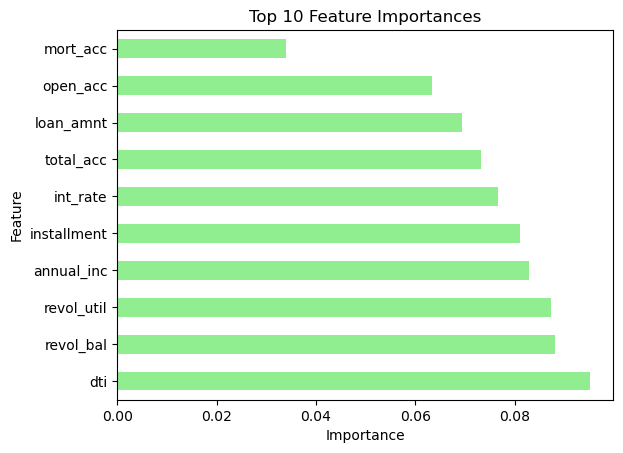

In [38]:
import matplotlib.pyplot as plt  

# Create a DataFrame with feature names and importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importances_sorted = importances_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = importances_sorted.head(10)

# Plot the top 10 feature importances
top_10_features.plot(kind='barh', x='Feature', y='Importance', color='lightgreen', title='Top 10 Feature Importances', legend=False)

# Show plot
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
